<a href="https://colab.research.google.com/github/Sftwr-crativ/Image-Classification/blob/main/ImageClassificationProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import Libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

## 1. Loading data

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

170508288/170498071 [==============================] - 6s 0us/step


#### To verify that the dataset looks correct, let's plot the first 5 images from the training set and display the class name below each image.

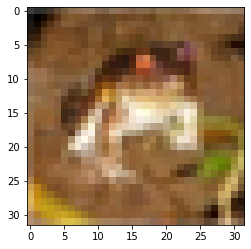

[6]


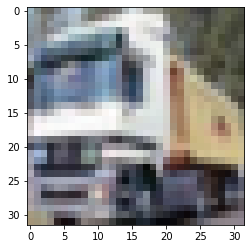

[9]


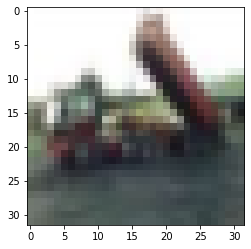

[9]


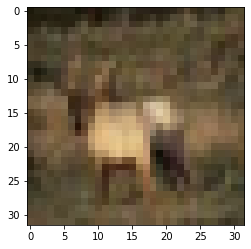

[4]


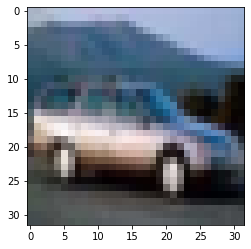

[1]


In [ ]:
for pic in range(0, 5):
 plt.imshow(train_images[pic], interpolation='nearest')
 plt.show()
 print(train_labels[pic])


In [ ]:
def showImages(num_row,num_col,X,Y):
    
    import matplotlib.pyplot as plt
    %matplotlib inline

    from sklearn.utils import shuffle
    (X_rand, Y_rand) = shuffle(X, Y)
    
    fig, axes = plt.subplots(num_row,num_col,figsize = (12,12))
    axes = axes.ravel()
    for i in range(0, num_row*num_col):
        axes[i].imshow(X_rand[i])
        axes[i].set_title("{}".format(labels[Y_rand.item(i)]))
        axes[i].axis('off')
        plt.subplots_adjust(wspace =1)
        
    return

In [ ]:

labels = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

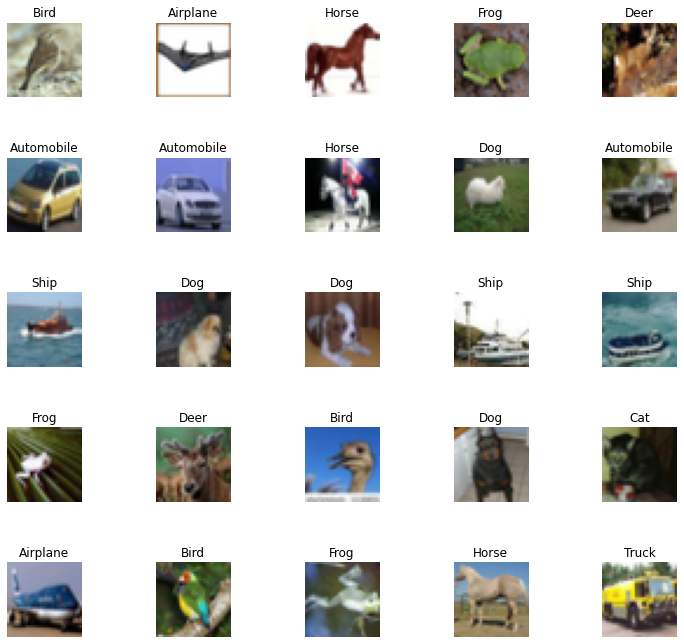

In [ ]:
num_row = 5
num_col = 5
showImages(num_row,num_col,X =train_images,Y = train_labels)

## 2. Define your convolution neural network

Define the convolutional base using a common pattern: a stack of Conv2D and MaxPooling2D layers.

As input, a CNN takes tensors of shape (image_height, image_width, color_channels), ignoring the batch size. color_channels refers to (R,G,B). In this example, you will configure our CNN to process inputs of shape (32, 32, 3), which is the format of CIFAR images. You can do this by passing the argument input_shape to our first layer.

Define your dense layers here.

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout

Try 2 different CNN architectures by (stacking different numbers of conv2d layers, use different dropouts etc), which one has better accuracy? Do you know why? 

Now, let's display the architecture of your model.

In [ ]:
model = Sequential()

# filter: "number of filter windows convolving on an image"
model.add(Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=(32,32,3))) 
model.add(MaxPooling2D(pool_size=2))
#model.add(Dropout(0.2)) # regularization, try different numbers

## Stack one more covolution block, will it improve accuracy?
# model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
# model.add(MaxPooling2D(pool_size=2))
# model.add(Dropout(0.2))

model.add(Flatten()) # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(256, activation='relu')) #The first hidden layer is a set of 256 nodes (artificial neurons).
model.add(Dense(10, activation='softmax')) # And finally, our final softmax layer with 10 neurons, for the 10 fashion categories:

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 7200)              0         
                                                                 
 dense_6 (Dense)             (None, 256)               1843456   
                                                                 
 dense_7 (Dense)             (None, 10)                2570      
                                                                 
Total params: 1,846,922
Trainable params: 1,846,922
Non-trainable params: 0
____________________________________________

## 3. Evaluate the model

Plot out the accuracy and valdation accuracy. What is your accuracy?

In [ ]:
BATCH_SIZE= 1000 # try another batch size
EPOCHS = 10
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# model.compile(loss='sparse_categorical_crossentropy',
            # optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
             #metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split=0.2, verbose=1)

Epoch 1/10
40/40 [==============================] - 32s 793ms/step - loss: 1.9329 - accuracy: 0.3020 - val_loss: 1.6871 - val_accuracy: 0.3979
Epoch 2/10
 8/40 [=====>........................] - ETA: 23s - loss: 1.6500 - accuracy: 0.4010

KeyboardInterrupt: ignored

## 4. Improvements


*   What can you do to further improve the accuracy?
*   Does adding more layers help?
*   How can we prevent overfitting?
*   What dropouts and learning rate did you use? Did they impact the model performance?
*   What impact does your model have on society?





In [ ]:
model = Sequential()

# filter: "number of filter windows convolving on an image"
model.add(Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=(32,32,3))) 
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2)) # regularization, try different numbers

## Stack one more covolution block, will it improve accuracy?
model.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Flatten()) # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(500, activation='relu')) #The first hidden layer is a set of 256 nodes (artificial neurons).
model.add(Dense(10, activation='softmax')) # And finally, our final softmax layer with 10 neurons, for the 10 fashion categories:

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 15, 15, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 32)        9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 6, 6, 32)         0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 6, 6, 32)         

In [ ]:
BATCH_SIZE= 64 # try another batch size
EPOCHS = 10

model.compile(loss='sparse_categorical_crossentropy',
optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
metrics=['accuracy'])
            
from keras import backend as K
K.set_value(model.optimizer.learning_rate, 0.1)


model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split=0.2, verbose=1)

Epoch 1/10
625/625 [==============================] - 30s 47ms/step - loss: 1.5135 - accuracy: 0.4592 - val_loss: 1.3149 - val_accuracy: 0.5404
Epoch 2/10
625/625 [==============================] - 29s 46ms/step - loss: 1.1966 - accuracy: 0.5786 - val_loss: 1.1673 - val_accuracy: 0.5990
Epoch 3/10
625/625 [==============================] - 29s 47ms/step - loss: 1.0757 - accuracy: 0.6234 - val_loss: 1.1094 - val_accuracy: 0.6145
Epoch 4/10
625/625 [==============================] - 28s 46ms/step - loss: 0.9769 - accuracy: 0.6579 - val_loss: 1.0984 - val_accuracy: 0.6194
Epoch 5/10
625/625 [==============================] - 29s 46ms/step - loss: 0.8842 - accuracy: 0.6929 - val_loss: 1.0560 - val_accuracy: 0.6393
Epoch 6/10
625/625 [==============================] - 28s 45ms/step - loss: 0.8072 - accuracy: 0.7198 - val_loss: 1.0563 - val_accuracy: 0.6409
Epoch 7/10
625/625 [==============================] - 28s 45ms/step - loss: 0.7385 - accuracy: 0.7436 - val_loss: 1.0373 - val_accuracy:

In [ ]:
#train_loss, train_accuracy = model.evaluate(train_images, train_labels, batch_size=BATCH_SIZE)
#train_accuracy

In [ ]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels, batch_size=BATCH_SIZE)
test_accuracy

157/157 [==============================] - 2s 15ms/step - loss: 1.1138 - accuracy: 0.6417


0.641700029373169

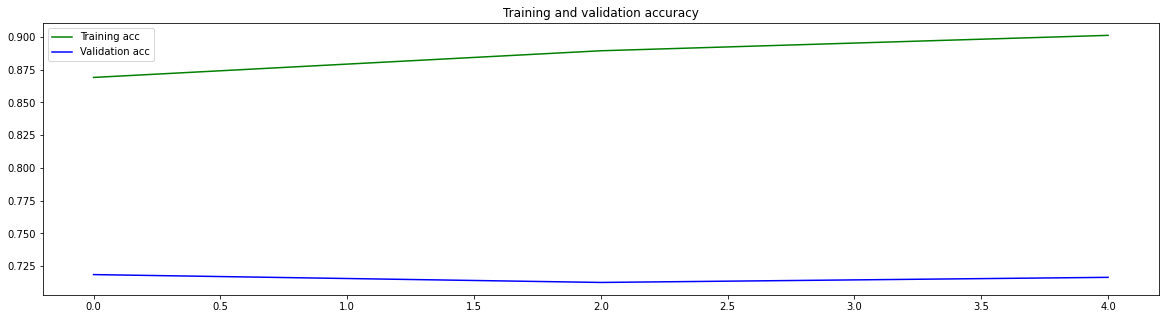

In [ ]:
import pandas as pd

def plot_history(history, samples=2, init_phase_samples=None):
    epochs = history.params['epochs']
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    every_sample =  int(epochs / samples)
    acc = pd.DataFrame(acc).iloc[::every_sample, :]
    val_acc = pd.DataFrame(val_acc).iloc[::every_sample, :]

    fig, ax = plt.subplots(figsize=(20,5))

    ax.plot(acc, 'g', label='Training acc')
    ax.plot(val_acc, 'b', label='Validation acc')
    ax.set_title('Training and validation accuracy')
    ax.legend()

plot_history(history)